# Байесовская статистика, DS-поток.
## Задание BS.3
### Марковские цепи. PageRank.

*\cdotПравила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.
**Баллы за задание:**

* Задача 1 &mdash; 100 баллов;
* Задача 2 &mdash; 30 балла;
* Задача 3 &mdash; 30 балла;
* Задача 4 &mdash; 20 баллов;
* Задача 5 &mdash; 10 балла.

--------------

Для выполнения задания потребуются следующие библиотеки: bs4, urllib, networkx. Следующей командой можно их поставить (Linux):

`pip3 install -U beautifulsoup4 urllib3 networkx`

In [ ]:
# Bot check

# HW_ID: ds_bs_3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

---
## PageRank

### Задача 1.

#### История

(Взято с <a href='https://ru.wikipedia.org/wiki/PageRank'>Википедии</a>)

В 1996 году Сергей Брин и Ларри Пейдж, тогда ещё аспиранты Стэнфордского университета, начали работу над исследовательским проектом BackRub — поисковой системой по Интернету, использующей новую тогда идею о том, что веб-страница должна считаться тем «важнее», чем больше на неё ссылается других страниц, и чем более «важными», в свою очередь, являются эти страницы. Через некоторое время BackRub была переименована в Google. Первая статья с описанием применяющегося в ней метода ранжирования, названного PageRank, появилась в начале 1998 года, за ней следом вышла и статья с описанием архитектуры самой поисковой системы.

Их система значительно превосходила все существовавшие тогда поисковые системы, и Брин с Пейджем, осознав её потенциал, основали в сентябре 1998 года компанию Google Inc., для дальнейшего её развития как коммерческого продукта.

#### Описание

Введем понятие веб-графа. Ориентированный граф $G = (V, E)$ называется веб-графом, если 
* $V = \{url_i\}_{i=1}^n$ --- некоторое подмножество страниц в интернете, каждой из которых соответствует адрес $url_i$.
* Множество $E$ состоит из тех и только тех пар $(url_i, url_j)$, для которых на странице с адресом $url_i$ есть 
ссылка на $url_j$.

Рассмотрим следующую модель поведения пользователя. В начальный момент времени он выбирает некоторую страницу из $V$ в соответствии с некоторым распределением $\Pi^{(0)}$. Затем, находясь на некоторой странице, он может либо перейти по какой-то ссылке, которая размещена на этой странице, либо выбрать случайную страницу из $V$ и перейти на нее (damping factor). Считается, что если пользователь выбирает переход по ссылке, то он выбирает равновероятно любую ссылку с данной страницы и переходит по ней. Если же он выбирает переход не по ссылке, то он также выбирает равновероятно любую страницу из $V$ и переходит на ее (в частности может остаться на той же странице). Будем считать, что переход не по ссылке пользователь выбирает с некоторой вероятностью $p \in (0, 1)$. Соответственно, переход по ссылке он выбирает с вероятностью $1 - p$. Если же со страницы нет ни одной ссылки, то будем считать, что пользователь всегда выбирает переход не по ссылке.

Описанная выше модель поведения пользователя называется моделью PageRank. Нетрудно понять, что этой модели соответствует некоторая марковская цепь. Опишите ее.
* Множество состояний: V, т.е. множество возможных ссылок.
* Начальное распределение: $\Pi_0$, где $\Pi_0 = (\pi_j(0))_{j \in \mathcal{X}} = (P(X_0 = j))_{j \in \mathcal{X}}$
* Переходные вероятности: $P_{ij}(n) = P_{ij}(X_n = i | X_{n-1} = j) = (p \cdot \frac{1}{|V|}  + (1 - p) \cdot \frac{1}{|V(j)|}) \cdot I[i \in V(j)] + \frac{1}{|V|} \cdot I[i \not \in V(j)] $, $V(j)$ -- ссылки на странице j.

#### Вычисление

Данная марковская цепь является эргодической. Почему?

<Ответ>: Потому что переходы не зависит от номера перехода n, а также вероятность перейти по любой ссылке не равна нулю.

А это означает, что цепь имеет некоторое эргодическое распределение $\Pi$, которое является предельным и единственным стационарным. Данное распределение называется весом PageRank для нашего подмножества интернета.

Как вычислить это распределение $\Pi$ для данного веб-графа? Обычно для этого используют степенной метод (power iteration), суть которого состоит в следующем. Выбирается некоторое начальное распределение $\Pi^{(0)}$. Далее производится несколько итераций по формуле $\Pi^{(k)} = \Pi^{(k - 1)} P$, где $P$ --- матрица переходных вероятностей цепи, до тех пор, пока $\left\|\Pi^{(k)} - \Pi^{(k - 1)}\right\| > \varepsilon$. Распределение $\Pi^{(k)}$ считается приближением распредения $\Pi$.

Имеет ли смысл выполнять подобные итерации для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории?

<Ответ>: Нет, так как мы сойдемся к $\Pi$, .

А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

<Ответ>: Да, так мы все равно сможем понять в какой момент распределение $\Pi$ начинает сходиться

Какая верхняя оценка на скорость сходимости?

<Ответ>: O(p^k), так как этот множитель присутствует в обоих компонентах P.

**Часть 1**


In [1]:
from time import sleep
from itertools import product
import numpy as np
from scipy.stats import bernoulli

import networkx
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse, urlunparse
from collections import defaultdict

from tqdm.notebook import tqdm
import asyncio
import aiohttp

Реализуйте вычисление весов PageRank power-методом.

Реализовать может быть удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

*Подсказка: диагональные матрицы легче возводить в степень.*

In [2]:
def create_page_rank_markov_chain(links, damping_factor=0.15):
    """По веб-графу со списком ребер links строит матрицу
    переходных вероятностей соответствующей марковской цепи.

        links --- список (list) пар вершин (tuple),
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);

        Возвращает prob_matrix --- numpy.array, shape=(|V|, |V|).
    """
    links = np.array(links)
    N = links.max() + 1  # Число веб-страниц

    prob_matrix = np.full((N, N), damping_factor / N)

    for i in range(N):
        outgoing_links = links[links[:, 0] == i][:, 1]
        num_outgoing = len(outgoing_links)

        if num_outgoing > 0:
            prob_matrix[i, outgoing_links] += (1 - damping_factor) / num_outgoing

    prob_matrix = np.nan_to_num(prob_matrix, nan=damping_factor / N)

    return prob_matrix


def page_rank(
    links,
    start_distribution,
    damping_factor=0.15,
    tolerance=10 ** (-7),
    return_trace=False,
    max_iterations=100_000,
):
    """Вычисляет веса PageRank для веб-графа со списком ребер links
    степенным методом, начиная с начального распределения start_distribution,
    доводя до сходимости с точностью tolerance.

        links --- список (list) пар вершин (tuple),
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во
                            все моменты времени до сходимости

        Возвращает:
        1). если return_trace == False, то возвращает distribution ---
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости.
        Имеет тип numpy.array размерности
        (количество итераций) на |V|.
    """

    prob_matrix = create_page_rank_markov_chain(links, damping_factor)
    distribution = np.array(start_distribution)  
    trace = [distribution.copy()]

    for iteration in range(max_iterations):
        Pi_prev = distribution.copy()
        distribution = Pi_prev @ prob_matrix
        trace.append(distribution.copy())

        if np.linalg.norm(distribution - Pi_prev) < tolerance:
            break
    else:
        raise ValueError(f"Алгоритм PageRank не сошелся за {max_iterations} итераций.")

    if return_trace:
        return distribution.ravel(), np.array(trace)
    else:
        return distribution.ravel()

**Автоматическая проверка**

Реализацию функций `create_page_rank_markov_chain` и `page_rank` скопируйте в файл с названием `page_rank.py` и пришлите в бот вместе с заданием. Будет проверяться только корректность выдаваемых значений. Проверки на время работы не будет.

----------

Давайте посмотрим, как оно работает.
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [3]:
np.random.binomial(5, p=0.8, size = 10)

array([4, 4, 4, 4, 4, 3, 4, 4, 5, 3])

In [4]:
def random_graph(n, p):
    return list(set([(i, j) for i in range(n) for j in range(n) if np.random.binomial(1, p) == 1]))

In [5]:
random_graph(10, 0.1)

[(3, 8), (9, 0), (2, 1), (4, 9), (6, 1), (7, 3), (9, 4)]

Теперь сгенерируем случайный граф и нарисуем его.

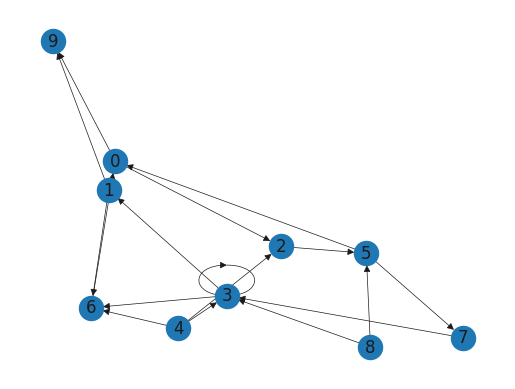

In [6]:
N, p = 10, 0.2
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

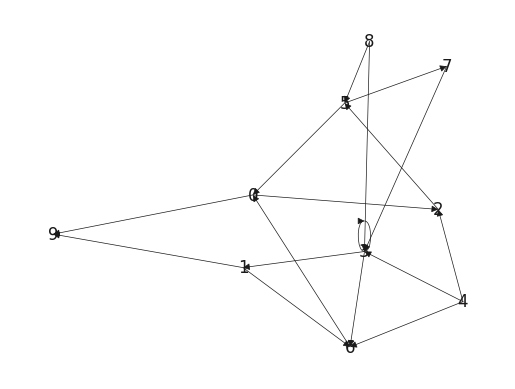

In [7]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution,
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

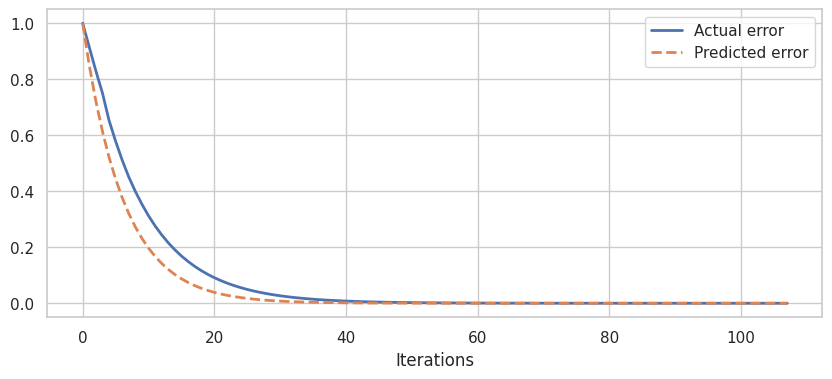

In [8]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, return_trace=True)

errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=1)

damping_factor = 0.15
lambda_2 = 1 - damping_factor
factors = np.array([lambda_2**i for i in range(errors.shape[0])])
predicted_errors = np.array([errors[0] * tmp_factor for tmp_factor in factors])
predicted_errors = predicted_errors.sum(axis=1)
errors = errors.sum(axis=1)

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label="Actual error")
plt.plot(x, predicted_errors, lw=2, label="Predicted error", linestyle="dashed")
plt.legend()
plt.xlabel("Iterations")
plt.show()


**Выводы:** 

Мы реализовали алгоритм PageRank, который как и должен, отдает предпочтение сайтам, на которые больше всего ссылок (вообще в более сложной моделе нужно еще было бы учесть веса). Также мы проверили, что наша оценка сходимости корректна.

Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

Зависимость от n

In [9]:
def analyze_convergence_for_N(damping_factor=0.15, N_values=[10, 20, 50, 100, 200]):
    plt.figure(figsize=(10, 6))

    # Проходим по всем значениям N и рисуем на одном графике
    for N in N_values:
        edges = random_graph(N, p=0.2)
        start_distribution = np.ones((1, N)) / N
        pr_distribution, pr_trace = page_rank(
            edges, start_distribution, return_trace=True, damping_factor=damping_factor
        )

        errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=1)

        lambda_2 = 1 - damping_factor
        factors = np.array([lambda_2**i for i in range(errors.shape[0])])
        errors = errors.sum(axis=1)

        x = np.arange(len(errors))
        plt.plot(x, errors, lw=2, label=f"Фактическая ошибка (N={N})")

    plt.legend()
    plt.xlabel("Итерации")
    plt.ylabel("Логарифм ошибка")
    plt.yscale("log")
    plt.title("Анализ сходимости для разных N")
    plt.show()

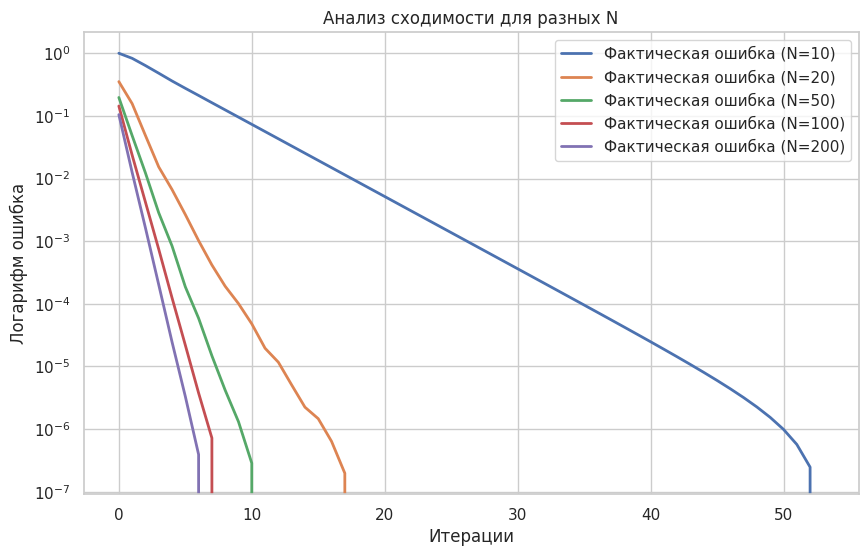

In [10]:
analyze_convergence_for_N()

Зависимость от p

In [11]:
def analyze_convergence_for_p(damping_factor=0.15, p_values=[0.1, 0.2, 0.4, 0.6, 0.8]):
    plt.figure(figsize=(10, 6))

    # Проходим по всем значениям p и рисуем на одном графике
    for p in p_values:
        N = 100  # Фиксируем N (или можно выбрать другой способ)
        edges = random_graph(N, p=p)
        start_distribution = np.ones((1, N)) / N
        pr_distribution, pr_trace = page_rank(
            edges, start_distribution, return_trace=True, damping_factor=damping_factor
        )

        errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=1)

        lambda_2 = 1 - damping_factor
        factors = np.array([lambda_2**i for i in range(errors.shape[0])])
        errors = errors.sum(axis=1)

        x = np.arange(len(errors))
        plt.plot(x, errors, lw=2, label=f"Фактическая ошибка (p={p})")

    plt.legend()
    plt.xlabel("Итерации")
    plt.ylabel("Логарифм ошибки")
    plt.yscale("log")
    plt.title("Анализ сходимости для разных p")
    plt.show()

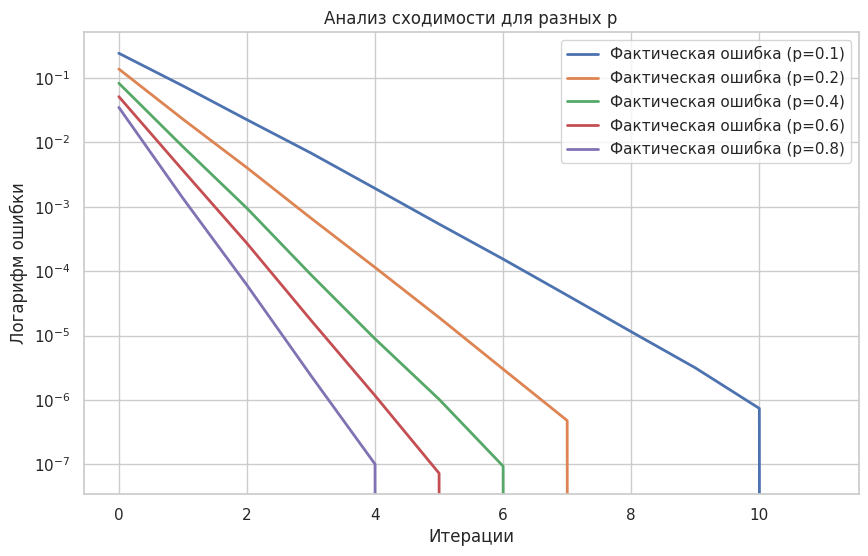

In [12]:
analyze_convergence_for_p()

Анализ зависимости от начального распределения.

In [13]:
def analyze_convergence_for_start_distribution(
    damping_factor=0.15,
    start_distributions=None,
    names=[
        "Равномерное распределение",
        "Случайное распределение",
        "Линейное распределение",
        "Дискретное распределение",
    ],
):
    """
    Строит график сходимости (ошибок) для разных начальных распределений (graph-level PageRank).

    Аргументы:
      damping_factor: параметр затухания.
      start_distributions: список начальных распределений в формате numpy.array с формой (1, N).
                           Если не указан, используются четыре примера:
                           1) Равномерное распределение.
                           2) Случайное распределение.
                           3) Линейно возрастающее распределение (с нормировкой).
                           4) Дискретное распределение (80% нулей, 20% единиц).
    """
    import numpy as np
    import matplotlib.pyplot as plt

    if start_distributions is None:
        N = 50
        start_distributions = [
            np.ones((1, N)) / N,  # Равномерное распределение
            np.random.rand(1, N),  # Случайное распределение
            np.linspace(1, N, N).reshape(1, N)
            / np.linspace(1, N, N).sum(),  # Линейное распределение
            np.random.choice(
                [0, 1], size=(1, N), p=[0.8, 0.2]
            ),  # Дискретное распределение
        ]

    plt.figure(figsize=(10, 6))

    N = 50  # Фиксированное число вершин
    p = 0.2  # Фиксированная вероятность ребра

    for i, start_distribution in enumerate(start_distributions):
        edges = random_graph(N, p=p)
        # Вычисляем PageRank и трассу распределений
        pr_distribution, pr_trace = page_rank(
            edges, start_distribution, return_trace=True, damping_factor=damping_factor
        )
        # Вычисляем ошибку сходимости для каждой итерации:
        # Предполагаем, что pr_trace имеет форму (iterations, 1, N)
        errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

        x = np.arange(len(errors))
        plt.plot(x, errors, lw=2, label=f"{names[i]}")

    plt.legend()
    plt.xlabel("Итерации")
    plt.ylabel("Ошибка")
    plt.yscale("log")
    plt.title("Анализ сходимости для разных начальных состояний")
    plt.show()

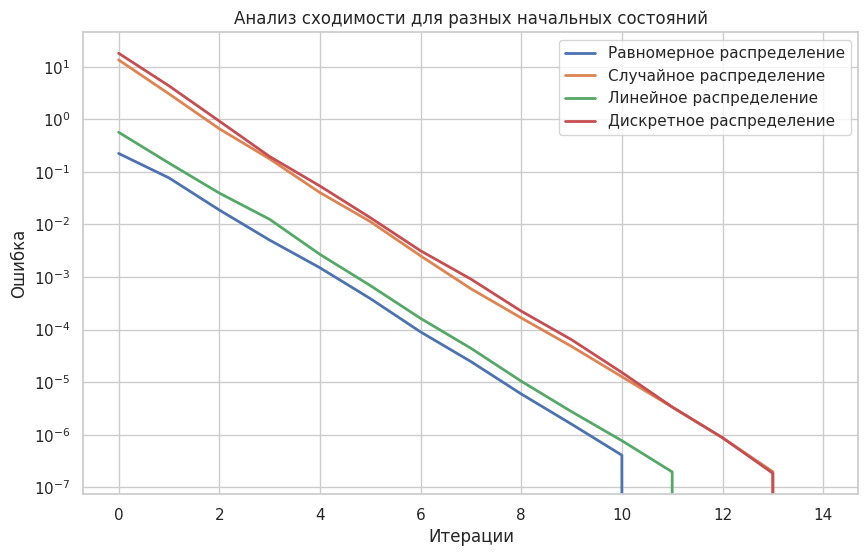

In [14]:
analyze_convergence_for_start_distribution()

Анализ весов для неслучайных графов.

In [15]:
def create_page_rank_markov_chain(links, damping_factor=0.15):
    """Построение матрицы переходных вероятностей"""
    links = np.array(links)
    unique_nodes = np.unique(links)
    N = unique_nodes.max() + 1 if len(unique_nodes) > 0 else 0
    
    prob_matrix = np.full((N, N), damping_factor / N)
    
    # Группировка исходящих ссылок для оптимизации
    outgoing = defaultdict(list)
    for src, dst in links:
        outgoing[src].append(dst)
    
    for i in range(N):
        outgoing_links = outgoing.get(i, [])
        num_outgoing = len(outgoing_links)
        
        if num_outgoing > 0:
            prob_matrix[i, outgoing_links] += (1 - damping_factor) / num_outgoing
        else:
            # Висячие узлы равномерно распределяют вес
            prob_matrix[i, :] += (1 - damping_factor) / N
    
    return np.nan_to_num(prob_matrix, nan=damping_factor/N)

def analyze_graphs(n=50):
    """Сравнение PageRank для разных типов графов на одном графике"""
    # Создаем графы
    graphs = {
        "Циклический": nx.cycle_graph(n),
        "Дерево": create_balanced_tree(n),
        "Полный": nx.complete_graph(n)
    }
    
    # Вычисляем PageRank для каждого графа
    results = {}
    for name, G in graphs.items():
        edges = list(G.edges())
        start_dist = np.ones(len(G.nodes())) / len(G.nodes())
        pr = page_rank(edges, start_dist, damping_factor=0.15)
        results[name] = (G.nodes(), pr)
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    colors = {'Циклический': 'blue', 'Дерево': 'red', 'Полный': 'green'}
    
    for name, (nodes, pr) in results.items():
        # Сортируем вершины по значению PageRank
        sorted_nodes = sorted(zip(nodes, pr), key=lambda x: -x[1])
        nodes_sorted, pr_sorted = zip(*sorted_nodes)
        
        plt.plot(nodes_sorted, pr_sorted, 'o-', 
                color=colors[name], 
                alpha=0.6,
                markersize=4,
                label=name)
    
    plt.title(f'Сравнение PageRank (n={n})')
    plt.xlabel('Вершины (отсортированы по PageRank)')
    plt.ylabel('Значение PageRank')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def create_balanced_tree(n):
    """Создание сбалансированного дерева с примерно n вершинами"""
    h = int(np.log2(n + 1))
    G = nx.balanced_tree(2, h)
    while len(G) > n:
        G.remove_node(len(G.nodes())-1)
    return G

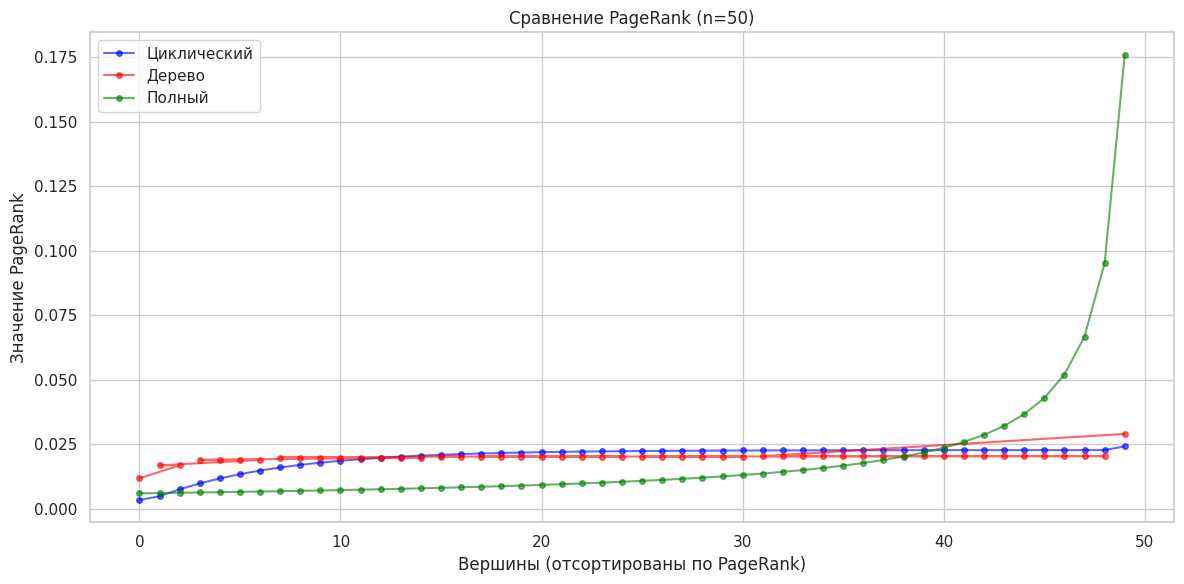

In [16]:
analyze_graphs(n=50)

**<Исследования и выводы>**

* С увеличением N увеличивается скорость сходимости

* С увеличением p уменьшается скорость сходимости

* Метод быстрее всего сходится при равномерном распределении

* Ожидаемо, веса полного графа являются наибольшими.



**Часть 2**

В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [17]:
def load_links(url, sleep_time=1, attempts=5, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': link[0] = parsed_url.scheme
            if link[1] == '': link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Код ниже загружает $N$ веб-страниц, начиная с некоторой стартовой страницы и переходя по ссылкам. Загрузка происходит методом обхода в ширину. Все собранные урлы страниц хранятся в urls. В links хранится список ссылок с одной страницы на другую. Особенность кода такова, что в urls хранятся все встреченные урлы, которых может быть сильно больше $N$. Аналогично, в links ребра могут ссылаться на страницы с номером больше $N$. Однако, все ребра из links начинаются только в первых $N$ страницах. Таким образом, для построения веб-графа нужно удалить все, что связано с вершинами, которые не входят в первые $N$.

Это очень примерный шаблон, к тому же не оптимальный. Можете вообще его не использовать и написать свое.

In [18]:
urls = ['http://wikipedia.org/wiki/']
site = get_site(urls[0])
links = []

N = 10
for i in range(N):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000).
Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

Для получения дополнительных баллов проведите аналогичные исследования для больших сайтов. Так же вы можете провести исследования, не ограничиваясь загрузкой только одного сайта.

1) Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000).
Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

Возьмем Двач

In [19]:
def build_web_graph(start_url, max_depth=3, max_links_per_page=20):
    urls = [start_url]
    links = []
    visited = set()  # Список посещенных URL

    for depth in range(max_depth):
        current_urls = list(urls)  # Копируем текущие URL
        for url in tqdm(current_urls):
            if url in visited:
                continue
            visited.add(url)
            try:
                links_from_url = load_links(url, sleep_time=0.1)
                
                # Фильтрация ссылок по домену текущего сайта
                site = get_site(url)
                links_from_url = list(filter(lambda x: get_site(x) == site, links_from_url))

                for link in links_from_url[:max_links_per_page]:
                    if link not in urls:
                        urls.append(link)
                    links.append((urls.index(url), urls.index(link)))  # Добавляем ребро в граф
            except:
                print(f"Не удалось загрузить {url}")

    return urls, links

In [20]:
def short_url(url):
    """Возвращает сокращенную версию URL без домена.
    Если путь не пустой, возвращается только путь, иначе — домен."""
    parsed = urlparse(url)
    return parsed.path if parsed.path else parsed.netloc

def visualize_graph(urls, links):
    G = nx.DiGraph()
    G.add_edges_from(links)

    in_degrees = dict(G.in_degree())
    # Размер вершины зависит от степени входа, масштабирование можно подбирать
    node_sizes = [in_degrees.get(node, 0) * 20 + 50 for node in G.nodes()]

    plt.figure(figsize=(12, 12))
    # Увеличим оптимальное расстояние между вершинами, параметр k можно менять
    pos = nx.spring_layout(G, k=3, iterations=100)

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="blue", alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=0.1, alpha=0.5, edge_color="gray")
    
    # Используем сокращенные URL в качестве меток
    labels = {i: short_url(urls[i]) for i in range(len(urls))}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color="black")

    plt.title("Веб-граф сайта", fontsize=16)
    plt.axis("off")
    plt.show()

In [21]:
start_url = "https://2ch.hk/"
urls, links = build_web_graph(start_url, max_depth=2, max_links_per_page=50)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

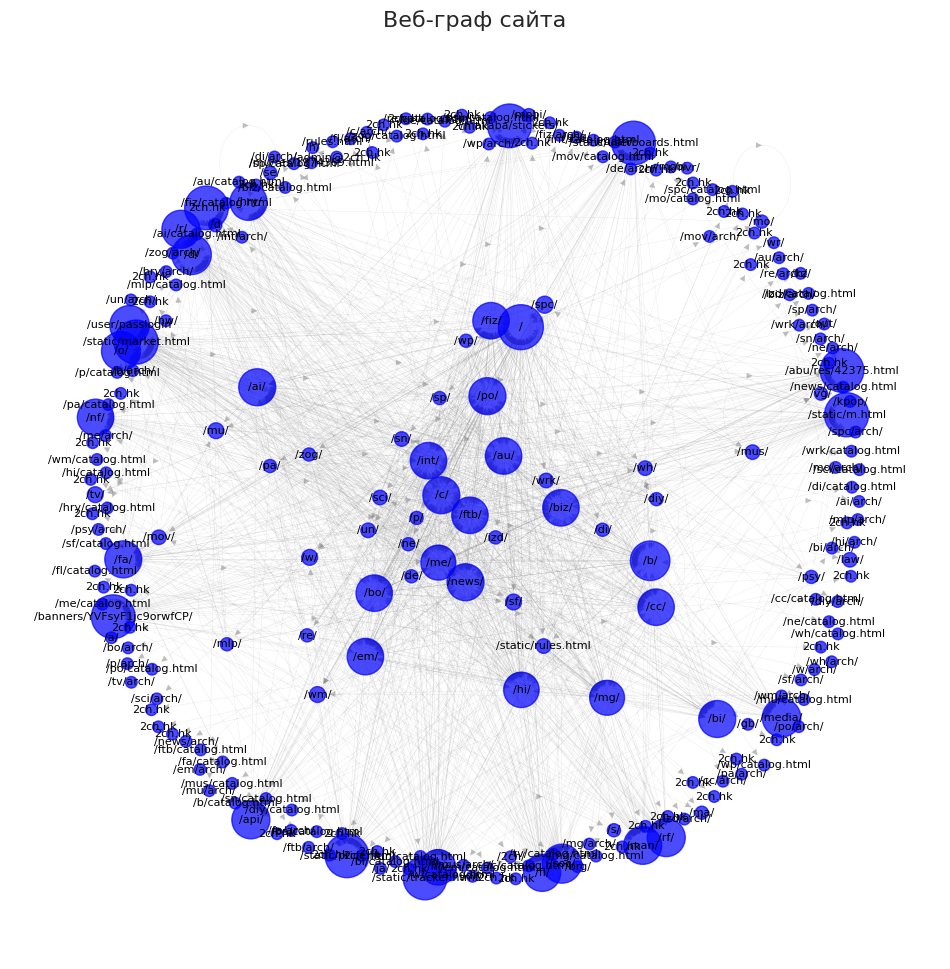

In [22]:
visualize_graph(urls, links)

2) Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1).Постройте гистограмму весов. Что можно сказать про скорость сходимости?

In [23]:
def visualize_graph_page_rank(urls, links):
    """Визуализация веб-графа с размерами узлов по PageRank"""
    G = nx.DiGraph()
    G.add_edges_from(links)

    # Вычисляем PageRank
    start_distribution = np.ones(len(urls)) / len(urls)
    pr_distribution = page_rank(links, start_distribution)

    # Масштабируем значения PageRank для визуализации
    pr_values = {i: pr_distribution[i] for i in range(len(urls))}
    node_sizes = [pr_values[node] * 1e7 * 100 + 50 for node in G.nodes()]

    plt.figure(figsize=(15, 10))
    pos = nx.spring_layout(G, k=0.5, iterations=50)  # Оптимизированная layout

    # Создаем оси для графа
    ax = plt.gca()

    # Рисуем элементы графа
    nodes = nx.draw_networkx_nodes(
        G,
        pos,
        node_size=node_sizes,
        node_color=list(pr_values.values()),
        cmap="viridis",
        alpha=0.8,
        ax=ax,
    )

    nx.draw_networkx_edges(
        G, pos, width=0.5, alpha=0.3, edge_color="gray", arrowsize=10, ax=ax
    )

    # Добавляем подписи
    labels = {i: short_url(urls[i]) for i in range(len(urls))}
    nx.draw_networkx_labels(
        G,
        pos,
        labels=labels,
        font_size=8,
        font_color="black",
        bbox=dict(
            facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.1"
        ),
        ax=ax,
    )

    # Добавляем цветовую шкалу
    sm = plt.cm.ScalarMappable(
        cmap="viridis",
        norm=plt.Normalize(vmin=min(pr_values.values()), vmax=max(pr_values.values())),
    )
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
    cbar.set_label("PageRank Value", fontsize=10)

    plt.title(
        "Веб-граф сайта\n(Размер узлов и цвет соответствуют значениям PageRank)",
        fontsize=14,
        pad=20,
    )
    plt.axis("off")


    plt.tight_layout()

    plt.show()


def plot_pagerank_histogram(pagerank_values):
    """Визуализирует распределение весов PageRank"""
    plt.figure(figsize=(10, 6))

    # Преобразуем в numpy array на случай, если это список
    values = np.array(pagerank_values).flatten()

    # Строим гистограмму
    n, bins, patches = plt.hist(
        values, bins=20, color="skyblue", alpha=0.7, edgecolor="navy", linewidth=0.5
    )

    # Настройка оформления
    plt.title("Распределение весов PageRank", fontsize=14, pad=20)
    plt.xlabel("Значение PageRank", fontsize=12)
    plt.ylabel("Количество страниц", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

In [24]:
start_distribution = np.ones(len(urls)) / len(urls)
pagerank_values = page_rank(links, start_distribution, damping_factor=0.15)

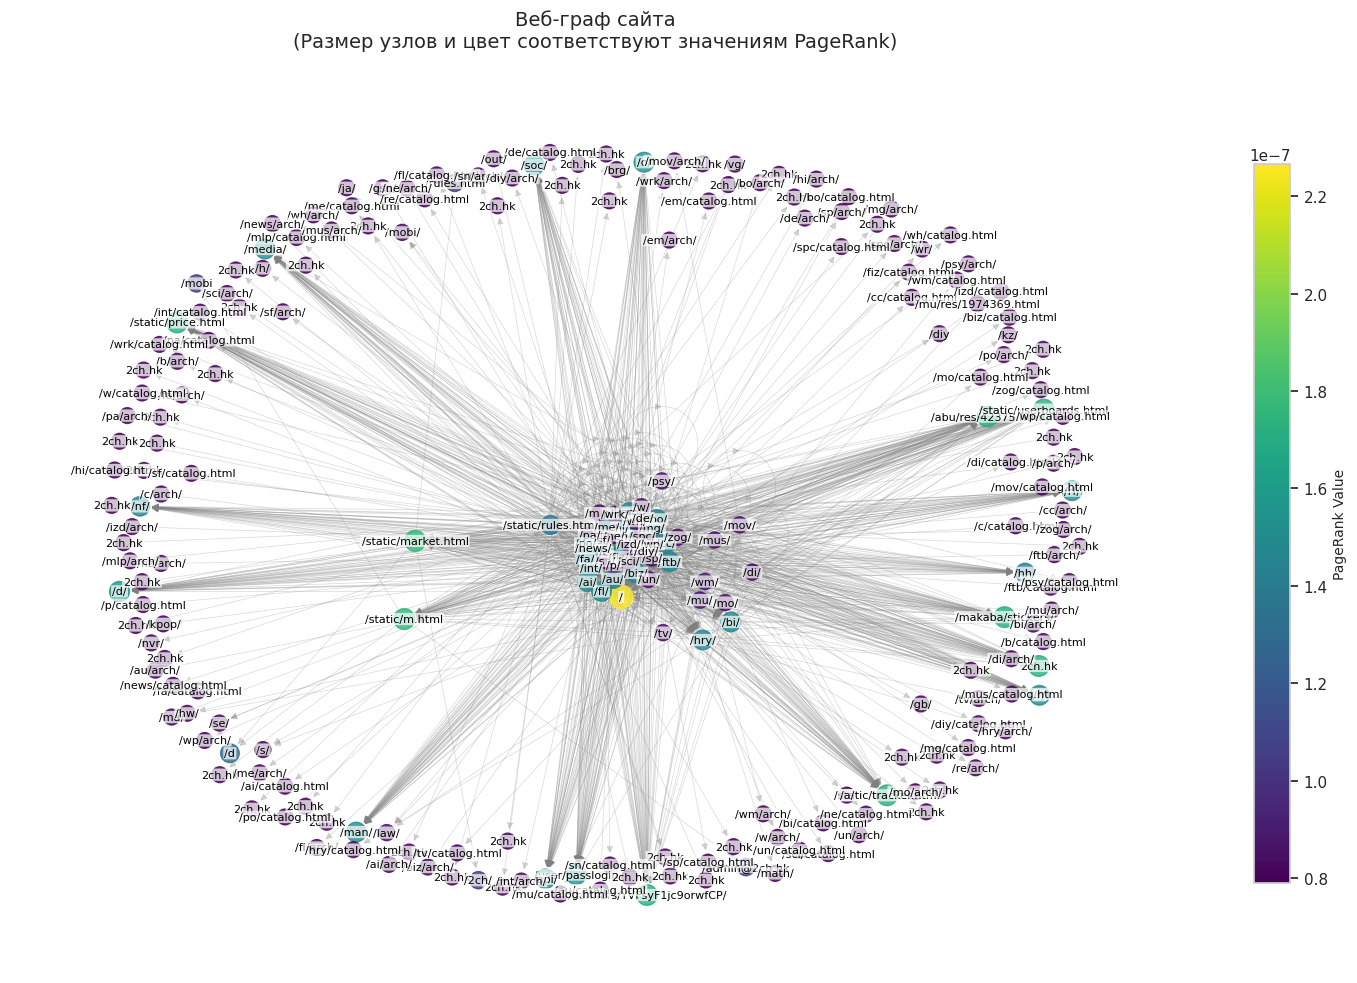

In [25]:
visualize_graph_page_rank(urls, links)

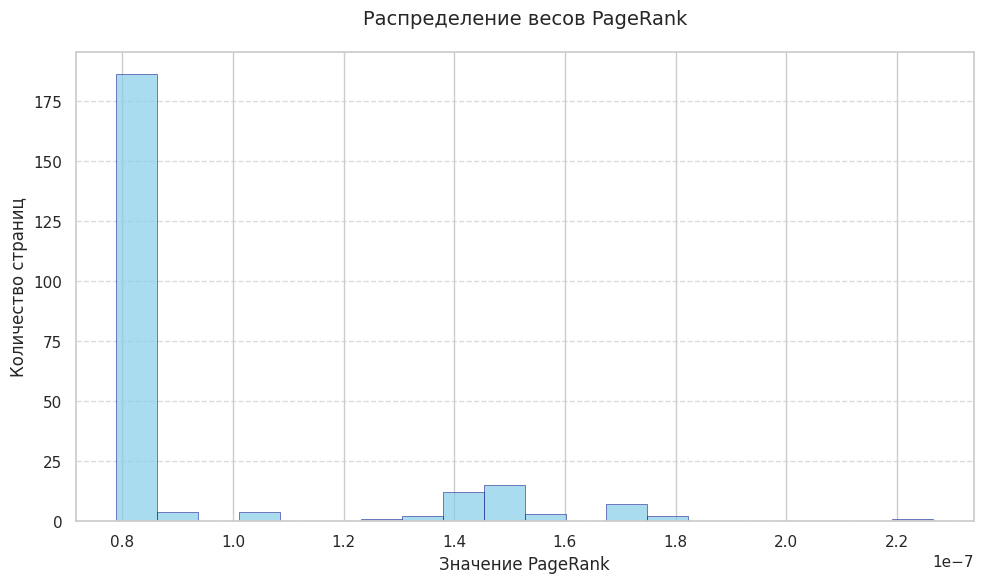

In [26]:
plot_pagerank_histogram(np.array(pagerank_values))

In [27]:
len(urls), len(links)

(237, 2462)

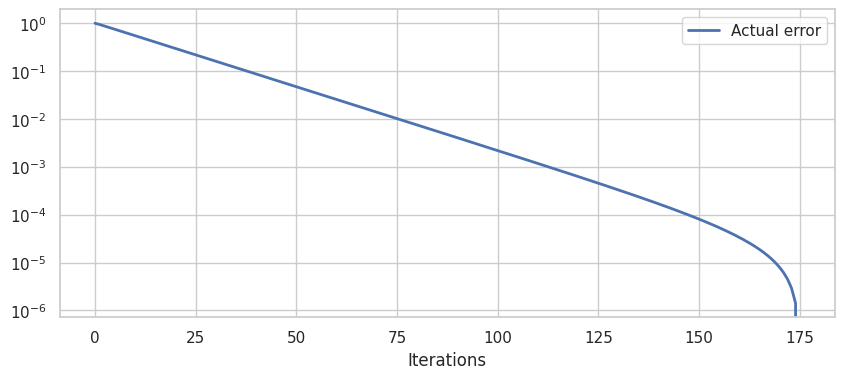

In [28]:
pr_distribution, pr_trace = page_rank(links, start_distribution, return_trace=True)

errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=1)

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label="Actual error")
plt.legend()
plt.xlabel("Iterations")
plt.yscale("log")
plt.show()


Как видим, требуемая сходимость на 238 ссылках и ~2500 связей достигается за 170 итерацийю

3) Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

In [49]:
def visualize_top_pages(urls, links, top_n=15):
    """Визуализация подграфа из top_n страниц с наибольшим PageRank.
       Размер узлов пропорционален значению PageRank, стрелки корректно указывают на узлы.
    """
    import matplotlib.pyplot as plt
    import networkx as nx

    G = nx.DiGraph()
    G.add_edges_from(links)

    start_distribution = np.ones(len(urls)) / len(urls)
    pr_distribution = page_rank(links, start_distribution, damping_factor=0.15)
    pr_values = {i: pr_distribution[i] for i in range(len(urls))}
    
    top_pages = sorted(pr_values.items(), key=lambda x: -x[1])[:top_n]
    top_nodes = [node for node, _ in top_pages]
    
    subgraph = G.subgraph(top_nodes)
    
    top_pr_values = {node: pr_values[node] for node in top_nodes}
    node_sizes = [top_pr_values[node] * 50000 + 700 for node in top_nodes]
    
    # Вычисляем расположение узлов один раз
    pos = nx.spring_layout(subgraph, k=0.8, iterations=100)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Рисуем узлы
    nodes = nx.draw_networkx_nodes(
        subgraph, 
        pos=pos,
        node_size=node_sizes,
        node_color=list(top_pr_values.values()),
        cmap='viridis',
        alpha=0.8,
        ax=ax
    )
    
    # Рисуем ребра с параметрами для стрелок
    nx.draw_networkx_edges(
        subgraph, 
        pos=pos,
        width=0.1,
        alpha=0.5,
        edge_color='gray',
        arrows=True,
        arrowsize=20,
        arrowstyle='-|>',
        ax=ax
    )
    
    # Рисуем метки с полными URL, сокращая их с помощью функции short_url
    labels = {i: short_url(urls[i]) for i in top_nodes}
    nx.draw_networkx_labels(
        subgraph, 
        pos=pos,
        labels=labels,
        font_size=9,
        font_color='black',
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'),
        ax=ax
    )
    
    # Добавляем цветовую шкалу
    sm = plt.cm.ScalarMappable(cmap='viridis', 
                               norm=plt.Normalize(vmin=min(top_pr_values.values()),
                                                  vmax=max(top_pr_values.values())))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='PageRank Value', shrink=0.8)
    
    ax.set_title(f"Топ-{top_n} страниц по PageRank\n(Размер узла соответствует важности)", 
                 fontsize=14, pad=20)
    ax.axis('off')
    
    # Анализ причин высокого PageRank
    print("\nПричины высокого PageRank этих страниц:")
    for node, score in top_pages:
        in_links = list(G.predecessors(node))
        out_links = list(G.successors(node))
        print(f"\nСтраница: {urls[node]} (Score: {score * 1e6:.4f})")
        print(f"• Количество входящих ссылок: {len(in_links)}")
        print(f"• Ссылаются с важных страниц: {len([x for x in in_links if x in top_nodes])} из топ-{top_n}")
        print(f"• Количество исходящих ссылок: {len(out_links)}")
    
    plt.tight_layout()
    plt.show()



Причины высокого PageRank этих страниц:

Страница: https://2ch.hk/ (Score: 0.2266)
• Количество входящих ссылок: 50
• Ссылаются с важных страниц: 3 из топ-15
• Количество исходящих ссылок: 50

Страница: https://2ch.hk/static/m.html (Score: 0.1754)
• Количество входящих ссылок: 48
• Ссылаются с важных страниц: 2 из топ-15
• Количество исходящих ссылок: 5

Страница: https://2ch.hk/static/market.html (Score: 0.1754)
• Количество входящих ссылок: 48
• Ссылаются с важных страниц: 2 из топ-15
• Количество исходящих ссылок: 5

Страница: https://2ch.hk/static/price.html (Score: 0.1713)
• Количество входящих ссылок: 47
• Ссылаются с важных страниц: 1 из топ-15
• Количество исходящих ссылок: 0

Страница: https://2ch.hk (Score: 0.1713)
• Количество входящих ссылок: 47
• Ссылаются с важных страниц: 1 из топ-15
• Количество исходящих ссылок: 0

Страница: https://2ch.hk/abu/res/42375.html (Score: 0.1713)
• Количество входящих ссылок: 47
• Ссылаются с важных страниц: 1 из топ-15
• Количество исходящ

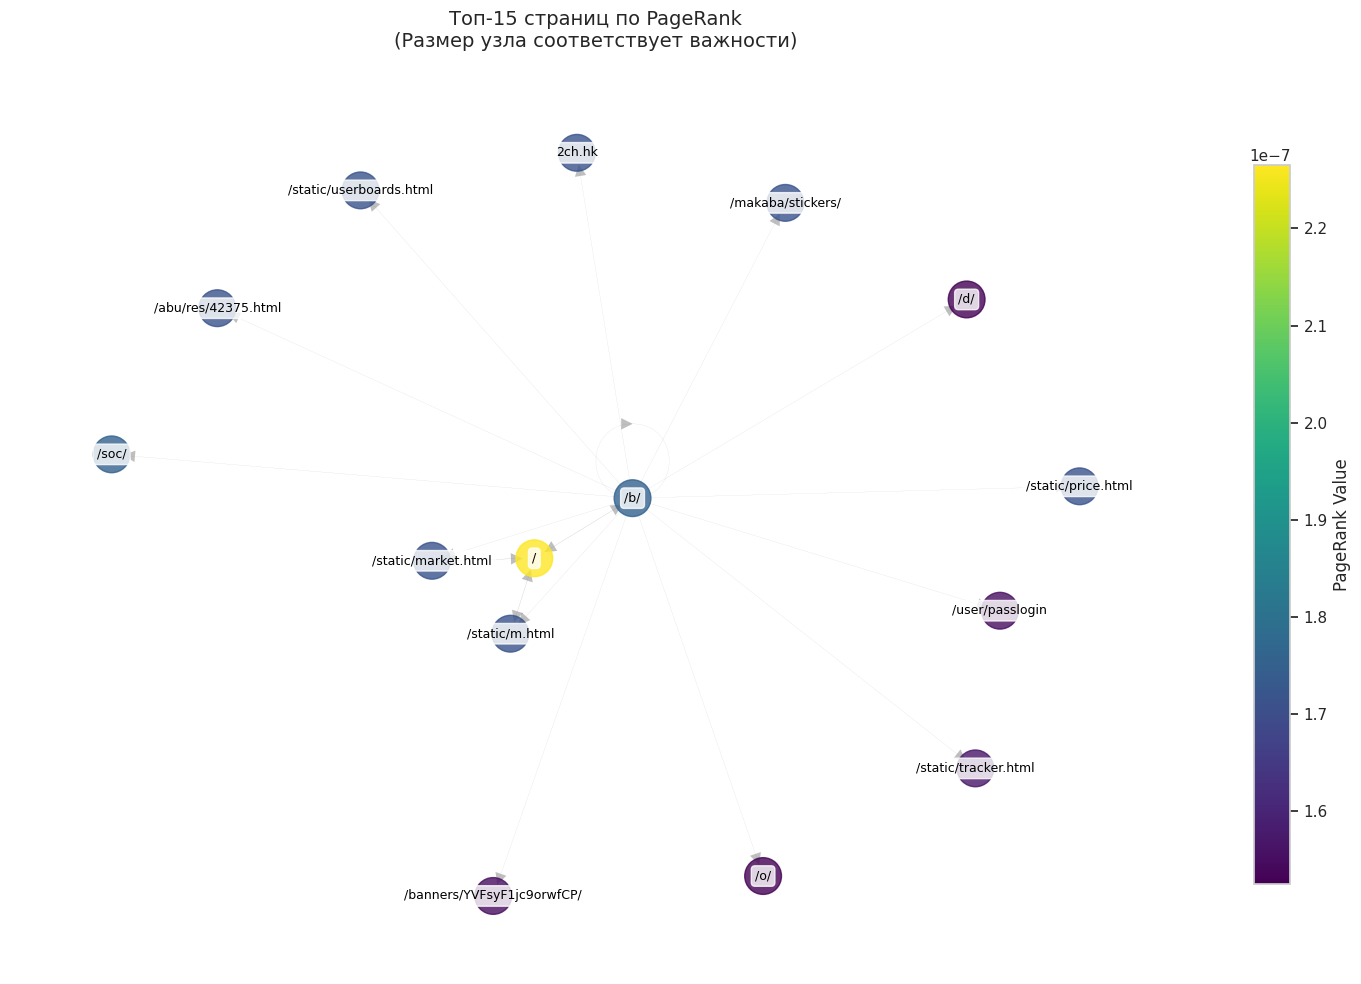

In [50]:
visualize_top_pages(urls, links, top_n=15)

Как видим, топовые ссылки имеют много ссылок на себя, а также ссылаются на другие топовые ссылки.

4) Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?


In [64]:
def compare_pagerank_convergence(edges, n_nodes, max_iter=100):
    """
    Анализ сходимости PageRank для разных начальных распределений
    без сглаживания ошибок.
    
    Параметры:
        edges - список рёбер графа [(src, dst), ...]
        n_nodes - количество вершин в графе
        max_iter - максимальное число итераций
    """
    # 1. Подготовка начальных распределений
    initial_distributions = [
        ('Равномерное', np.ones(n_nodes)/n_nodes),
        ('Сконцентрированное', np.array([1.0] + [0.0]*(n_nodes-1))),
        ('Случайное', np.random.dirichlet(np.ones(n_nodes))),
        ('Степенное', 1/np.arange(1, n_nodes+1)**0.5)
    ]
    
    # 2. Вычисление и визуализация
    plt.figure(figsize=(14, 8))
    
    for name, init_dist in initial_distributions:
        # Вычисляем PageRank с историей итераций
        final_pr, trace = page_rank(
            edges,
            init_dist.copy(),
            max_iterations=max_iter,
            return_trace=True
        )
        
        # Вычисляем ошибки (L2 норма от финального распределения)
        errors = np.linalg.norm(trace - final_pr, axis=1)
        
        # Визуализация
        plt.plot(errors, 
                label=name,
                linewidth=1.5,
                alpha=0.8)
    
    # 3. Настройка графика
    plt.yscale('log')
    plt.title(f"Сходимость PageRank (N={n_nodes}, max_iter={max_iter})", fontsize=14)
    plt.xlabel("Номер итерации", fontsize=12)
    plt.ylabel("Ошибка (L2 норма в log scale)", fontsize=12)
    
    plt.grid(True, which="both", linestyle=':', alpha=0.5)
    plt.legend(fontsize=10)
    
    # 4. Дополнительный анализ
    final_errors = [np.linalg.norm(trace[-1] - final_pr) 
                   for _, trace in [page_rank(edges, init, return_trace=True) 
                                  for _, init in initial_distributions]]
    
    print("\nАнализ сходимости:")
    print(f"Средняя конечная ошибка: {np.mean(final_errors):.2e}")
    print(f"Максимальная конечная ошибка: {np.max(final_errors):.2e}")
    
    plt.tight_layout()
    plt.show()


Анализ сходимости:
Средняя конечная ошибка: 1.83e-08
Максимальная конечная ошибка: 3.43e-08


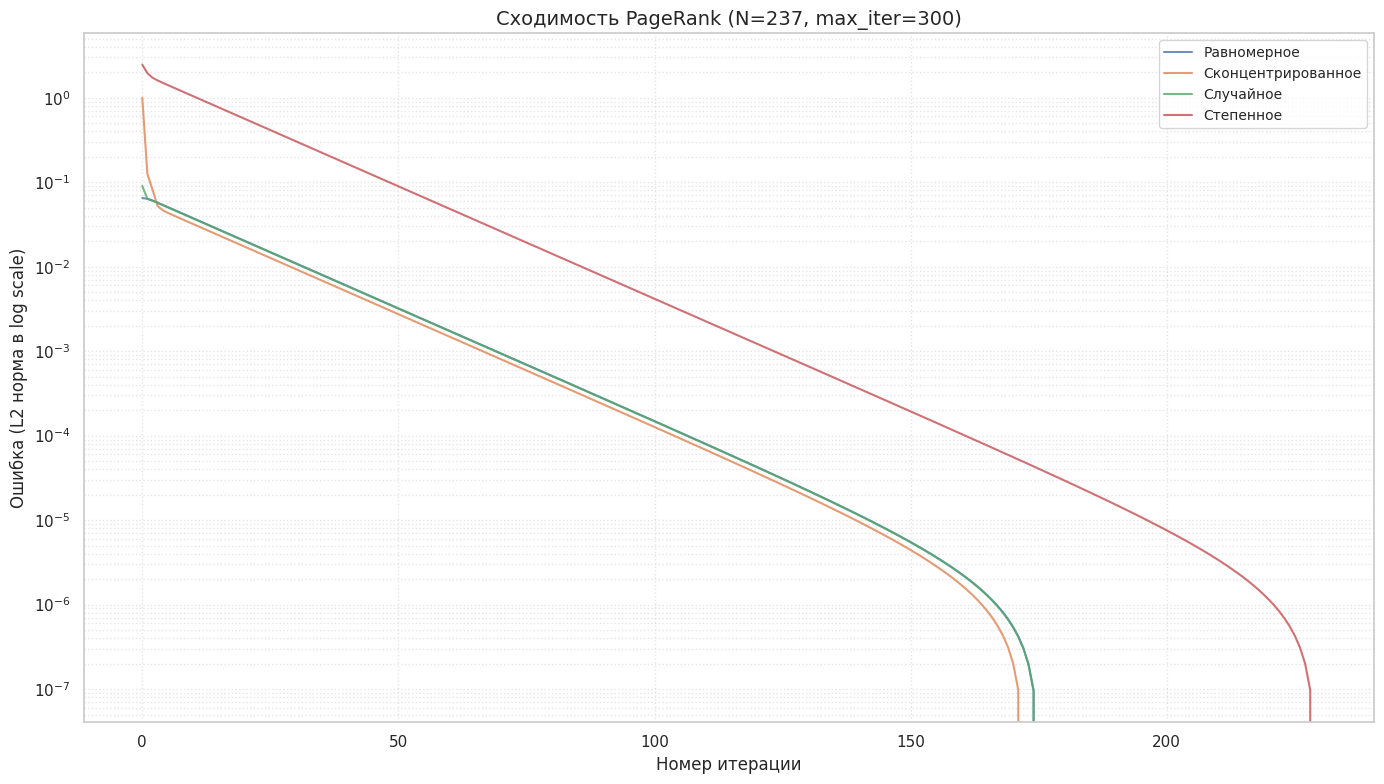

In [65]:
N = len(urls)  # Количество страниц в графе
compare_pagerank_convergence(links, N, max_iter=300)

Как видим случайное распределение показало наилучший результат, а степенное наихудший

**Выводы:**

В данной части мы проианализировали реальный сайт, и убедились, что метод работает на практике. Также мы разобрали что самые популярные ссылки часто ссылаются на себя. Заметим, что распределение весов PageRank получилось вырожденным.

-----
### Задача 2.
Пусть в модели PageRank пользователь браузера в дополнение к кликам по ссылкам один раз(после каждого клика по ссылке) может перейти по кнопке *Назад* и вернуться на предыдущую страницу. Можно ли такую модель описать с помощью однородной марковской цепи? Если да, опишите, если нет, докажите.

$\square$

Да, достаточно в качестве состояний выбрать пару (текущая страница, предыдущая страница)

Тогда цепь остается марковской, так как зная предыдущее состояние, мы вполне можем дойти до любого раннее посещенного сайта. В случае же перехода по ссылке ничего не поменялось.

Такая цепь будет однородной, так как не зависит от момента времени когда мы попали в текущее состояние, а только от текущей и предыдущей страницы.

$\blacksquare$

-----
### Задача 3.

Марковская цепь $(\xi_n,n\in{\mathbb Z}_{+})$ имеет начальное состояние $\xi_0=0$ и переходные вероятности ${\sf P}(\xi_{n+1}=k+1|\;\xi_{n}=k)=p$, ${\sf P}(\xi_{n+1}=k|\;\xi_{n}=k)=1-p$, $k,n\in{\mathbb N}$, $p\in[0,1]$. Найдите распределение $\xi_n$. Докажите, что последовательность $\tau_0=0$, $\tau_{k}=\min\{n:\;\xi_n=k\}$ также является цепью Маркова и найдите ее переходные вероятности.

$\square$

**см. пдф**

$\blacksquare$

-----
### Задача 4
Пусть $\{\xi_n,n\in\mathbb{Z}_+\}$ --- марковская цепь с фазовым пространством $S=\{1, ..., N\}$ и матрицей переходных вероятностей
$$
\begin{pmatrix}
q & p & 0 & 0 & ... & 0\\
q & 0 & p & 0 & ... & 0\\
q & 0 & 0 & p & ... & 0 \\
... \\
q & 0 & 0 & 0 & ... & p \\
1 & 0 & 0 & 0 & ... & 0
\end{pmatrix},
$$
где $0 < p < 1, q = 1-p$. Нарисуйте граф, соответствующей данной марковской цепи, и найдите предельное распределение.

$\square$

**см. пдф**

$\blacksquare$

-----
### Задача 5
Докажите, что если однородная марковская цепь с дискретным временем имеет несколько стационарных распределений, то их, на самом деле, бесконечно много.

$\square$

**см. пдф**

$\blacksquare$